<div class="alert alert-block alert-success">
    <h1 align="center">Machine Learning in Python</h1>
    <h3 align="center">Iris Dataset</h3>
    <h4 align="center">SeyedeMelika Ranaei Siadat</h5>
</div>

## About Iris Dataset

We will use the well known Iris data set. It contains 3 classes of 50 instances each, where each class refers to a type of iris plant. To simplify things, we take just the first two feature columns. Also, the two non-linearly separable classes are labeled with the same category, ending up with a binary classification problem.

<img src = "https://s3.amazonaws.com/assets.datacamp.com/blog_assets/Machine+Learning+R/iris-machinelearning.png">

<div class="alert alert-block alert-success">
    <h1 align="center">Import library</h1>
</div>

In [3]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

<div class="alert alert-block alert-success">
    <h1 align="center">Logistic Regression - Iris Dataset</h1>
</div>

In [5]:
iris=pd.read_csv('Iris.csv')

In [8]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [6]:
iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [7]:
iris['Species'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

## delete Id column

In [9]:
iris.drop("Id", axis=1, inplace = True)

In [11]:
iris.sample(5)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
104,6.5,3.0,5.8,2.2,Iris-virginica
98,5.1,2.5,3.0,1.1,Iris-versicolor
91,6.1,3.0,4.6,1.4,Iris-versicolor
125,7.2,3.2,6.0,1.8,Iris-virginica
50,7.0,3.2,4.7,1.4,Iris-versicolor


In [12]:
iris.shape

(150, 5)

In [13]:
iris.columns

Index(['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [15]:
type(iris)

pandas.core.frame.DataFrame

In [29]:
iris.dtypes

SepalLengthCm    float64
SepalWidthCm     float64
PetalLengthCm    float64
PetalWidthCm     float64
Species           object
dtype: object

In [31]:
iris.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

<div class="alert alert-block alert-success">
    <h2 align="center">Visualization with Seaborn</h2>
</div>

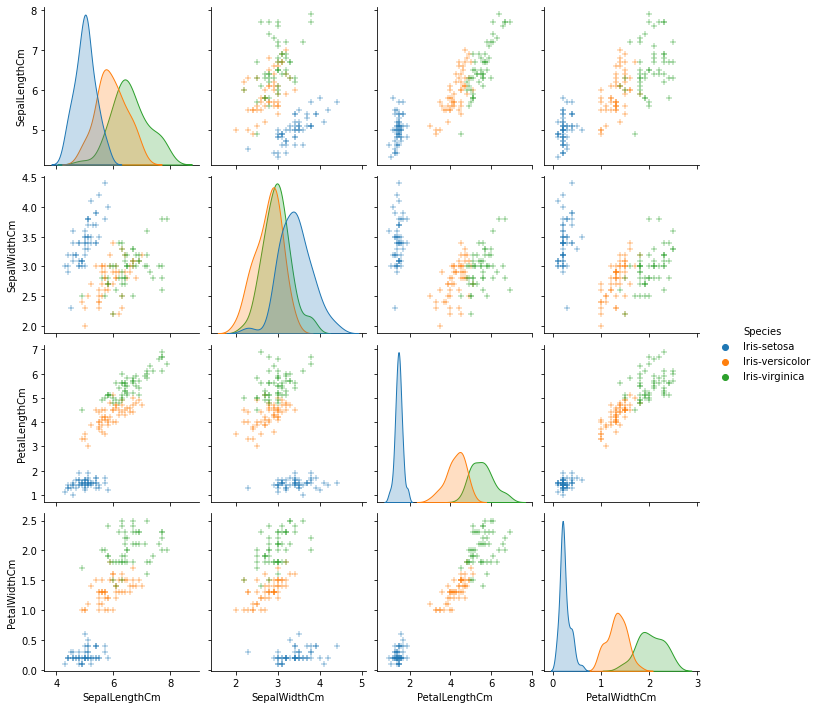

In [16]:
g = sns.pairplot(iris, hue='Species', markers='+')
plt.show()

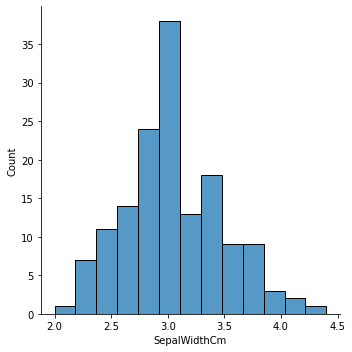

In [17]:
sns.displot(iris, x="SepalWidthCm")

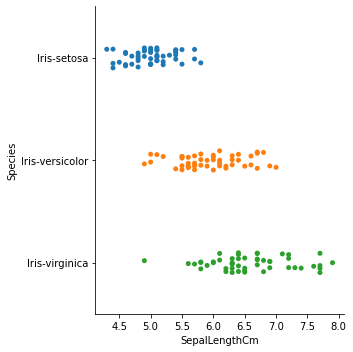

In [18]:
sns.catplot(x="SepalLengthCm", y="Species", data=iris)

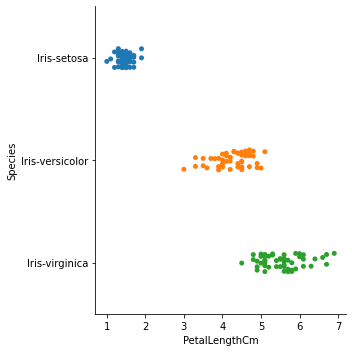

In [20]:
sns.catplot(x="PetalLengthCm", y="Species", data=iris)

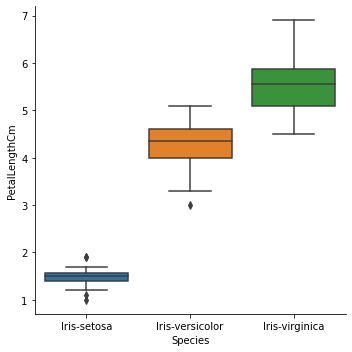

In [21]:
sns.catplot(x="Species", y="PetalLengthCm", kind="box", data=iris)

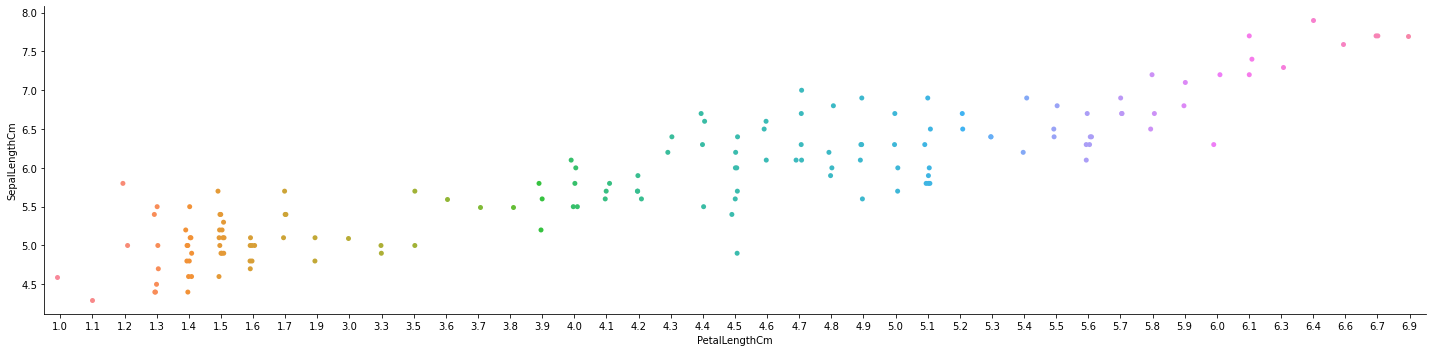

In [26]:
sns.catplot(x='PetalLengthCm',y='SepalLengthCm',data=iris,aspect=4)

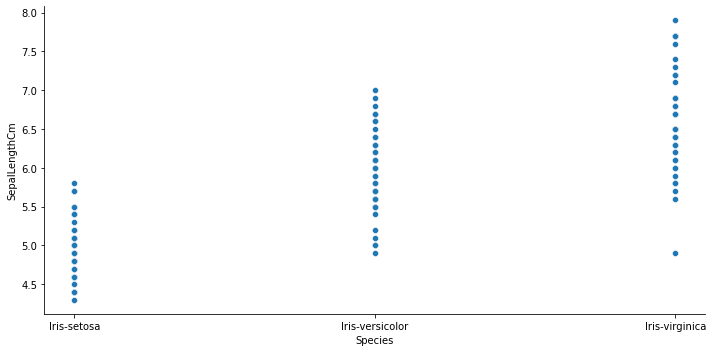

In [28]:
sns.relplot(x='Species' , y='SepalLengthCm' , aspect=2 , data=iris)

<AxesSubplot:>

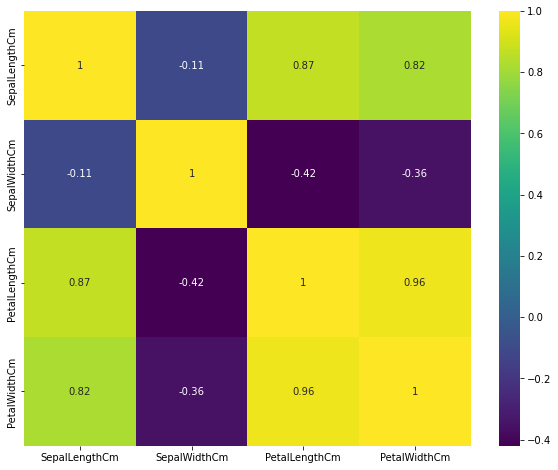

In [32]:
corr = iris.corr()
plt.figure(figsize=(10,8)) 
sns.heatmap(corr, cmap='viridis', annot=True)

<div class="alert alert-block alert-success">
    <h2 align="center">Logistic Regression</h2>
</div>

In [33]:
from sklearn.linear_model import LogisticRegression # for Logistic Regression Algorithm
from sklearn.model_selection import train_test_split # to split the dataset for training and testing 
from sklearn import metrics # for checking the model accuracy

In [34]:
iris

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [35]:
X = iris.drop(['Species'], axis=1)

In [41]:
y = iris['Species']

In [42]:
X.shape

(150, 4)

In [43]:
y.shape

(150,)

In [44]:
X

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [45]:
y

0         Iris-setosa
1         Iris-setosa
2         Iris-setosa
3         Iris-setosa
4         Iris-setosa
            ...      
145    Iris-virginica
146    Iris-virginica
147    Iris-virginica
148    Iris-virginica
149    Iris-virginica
Name: Species, Length: 150, dtype: object

In [46]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(120, 4)
(120,)
(30, 4)
(30,)


In [47]:
logreg = LogisticRegression(solver='liblinear')
logreg.fit(X_train, y_train)

LogisticRegression(solver='liblinear')

In [48]:
y_pred = logreg.predict(X_test)

In [50]:
y_pred

array(['Iris-versicolor', 'Iris-virginica', 'Iris-virginica',
       'Iris-setosa', 'Iris-virginica', 'Iris-versicolor', 'Iris-setosa',
       'Iris-virginica', 'Iris-setosa', 'Iris-virginica',
       'Iris-virginica', 'Iris-virginica', 'Iris-virginica',
       'Iris-virginica', 'Iris-setosa', 'Iris-setosa', 'Iris-virginica',
       'Iris-virginica', 'Iris-setosa', 'Iris-setosa', 'Iris-versicolor',
       'Iris-virginica', 'Iris-setosa', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-virginica', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-virginica'],
      dtype=object)

In [51]:
y_test

82     Iris-versicolor
134     Iris-virginica
114     Iris-virginica
42         Iris-setosa
109     Iris-virginica
57     Iris-versicolor
1          Iris-setosa
70     Iris-versicolor
25         Iris-setosa
84     Iris-versicolor
66     Iris-versicolor
133     Iris-virginica
102     Iris-virginica
107     Iris-virginica
26         Iris-setosa
23         Iris-setosa
123     Iris-virginica
130     Iris-virginica
21         Iris-setosa
12         Iris-setosa
71     Iris-versicolor
128     Iris-virginica
48         Iris-setosa
72     Iris-versicolor
88     Iris-versicolor
148     Iris-virginica
74     Iris-versicolor
96     Iris-versicolor
63     Iris-versicolor
132     Iris-virginica
Name: Species, dtype: object

In [52]:
print('The accuracy of Logistic Regression is: ', (metrics.accuracy_score(y_test, y_pred)))

The accuracy of Logistic Regression is:  0.9


In [53]:
pd.crosstab(logreg.predict(X),y)

Species,Iris-setosa,Iris-versicolor,Iris-virginica
row_0,,,
Iris-setosa,50,0,0
Iris-versicolor,0,43,1
Iris-virginica,0,7,49


In [64]:
logreg.coef_

array([[ 0.37485056,  1.41362296, -2.13927113, -0.98381238],
       [ 0.6614422 , -1.85206304,  0.49673616, -1.44770211],
       [-1.76978818, -1.04214701,  2.27771546,  2.44894829]])

In [65]:
logreg.intercept_

array([ 0.25608506,  0.76239239, -1.02598291])

<AxesSubplot:ylabel='Species'>

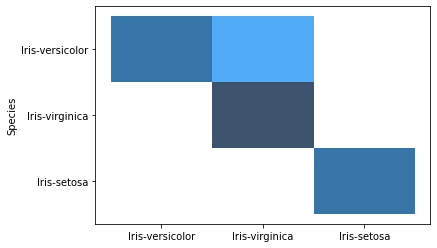

In [75]:
sns.histplot(x=y_pred,y=y_test)